# Makemore using Bigram

In [1]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns # for heatmap

In [2]:
with open('names.txt', 'r') as f:
    words = f.read().split()
print(len(words))

32033


In [3]:
characters = sorted(set(''.join(words)+ '.'))
print(characters)
len(characters)

['.', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


27

In [4]:
hmap = {c:n for c,n in zip(characters, [i for i in range(27)])}
char_hmap = {n:c for c,n in hmap.items()}
print(hmap,'\n',char_hmap)

{'.': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26} 
 {0: '.', 1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z'}


In [5]:
arr = torch.ones(27,27, dtype=torch.int32) # ones are used here to avoid inf in MLE.ie, model smoothening using fake counts.

In [6]:
for word in words:
    word = '.' + word + '.'
    for ch1,ch2 in zip(word, word[1:]):
        # print(ch1,ch2)
        arr[hmap[ch1]][hmap[ch2]] += 1 # Row for ch1, Column for ch2

In [7]:
P = arr/arr.sum(dim=1, keepdim=True) # dim=1 means for each row
P[0].sum()

tensor(1.)

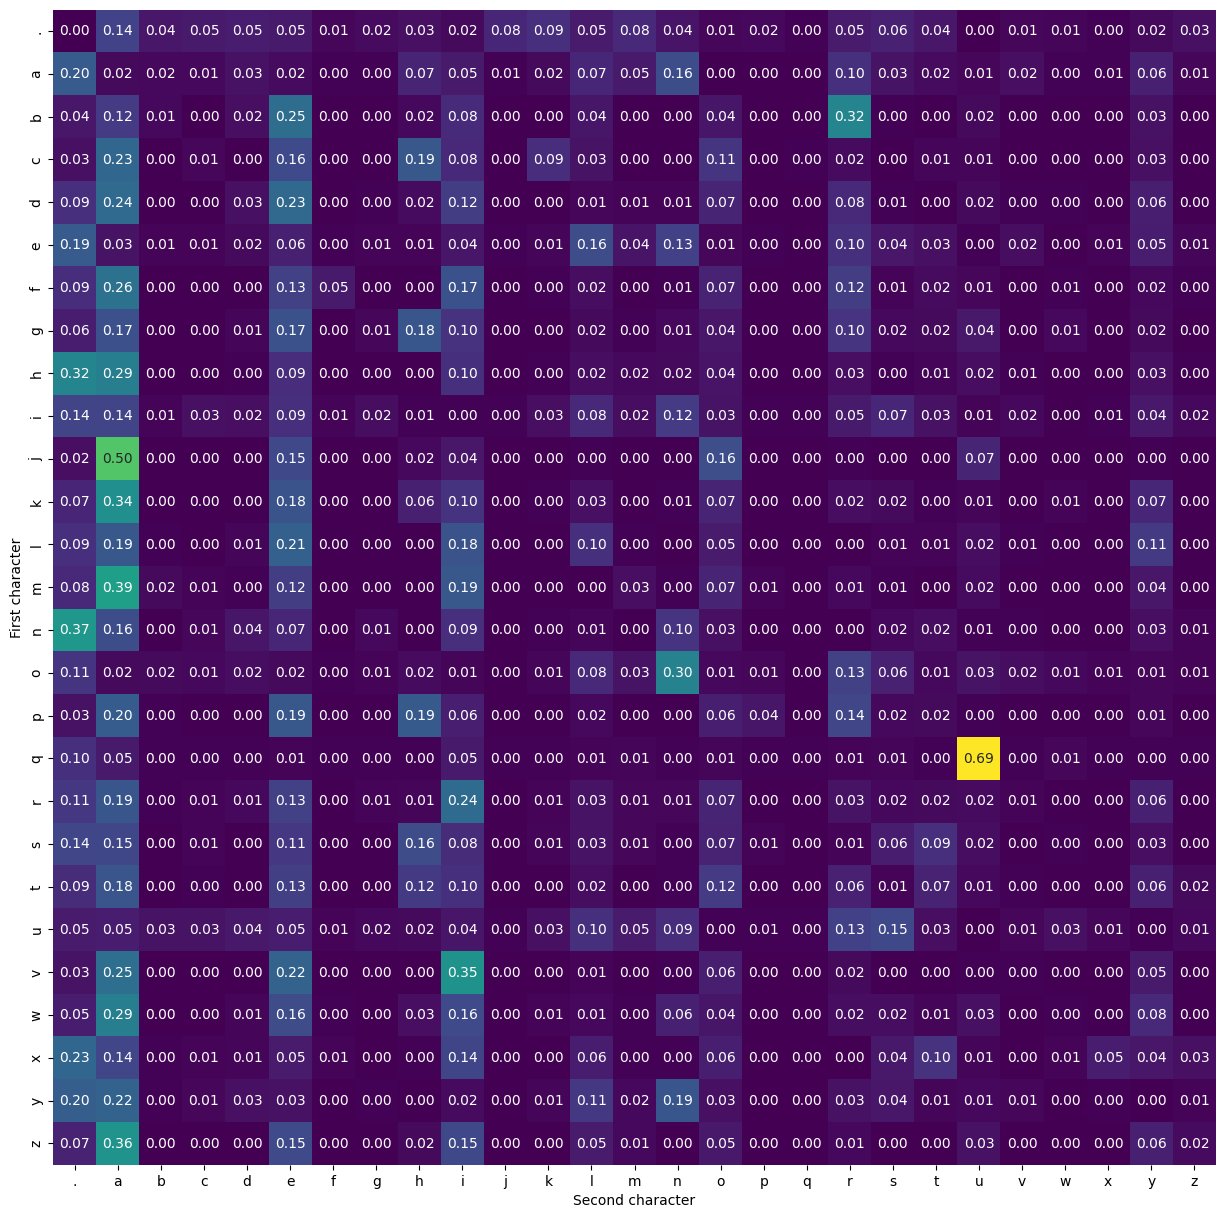

In [8]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(P, annot=True, fmt=".2f", cmap="viridis", cbar=False,annot_kws={"ha": 'center', "va": 'center'},xticklabels=[i for i in hmap], yticklabels=[i for i in hmap])
ax.set_xlabel("Second character")
ax.set_ylabel("First character")
plt.show()

In [9]:
# This will generate numbers using the probability distriution function

g = torch.Generator()
p = torch.rand(3)
p = p/p.sum()
print(p)
next_index = torch.multinomial(p, num_samples=20, replacement=True, generator=g)
print(next_index)

tensor([0.7531, 0.1655, 0.0814])
tensor([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0])


In [10]:
prob_distribution_of_char = P[0]
print(prob_distribution_of_char)
next_index = torch.multinomial(prob_distribution_of_char, num_samples=1, replacement=True, generator=g).item()
print(next_index)

tensor([3.1192e-05, 1.3759e-01, 4.0767e-02, 4.8129e-02, 5.2745e-02, 4.7785e-02,
        1.3038e-02, 2.0898e-02, 2.7293e-02, 1.8465e-02, 7.5577e-02, 9.2452e-02,
        4.9064e-02, 7.9195e-02, 3.5777e-02, 1.2321e-02, 1.6095e-02, 2.9008e-03,
        5.1154e-02, 6.4130e-02, 4.0830e-02, 2.4641e-03, 1.1759e-02, 9.6070e-03,
        4.2109e-03, 1.6719e-02, 2.9008e-02])
20


In [11]:
g = torch.Generator()

for i in range(10):
    out = []
    word = []
    index_of_char = 0 # . initially
    log_likelihood = 0
    while True:
        prob_distribution_of_char = P[index_of_char]
        next_index = torch.multinomial(prob_distribution_of_char, num_samples=1, replacement=True, generator=g).item()
        new_char = char_hmap[next_index]
        out.append(new_char)
        log_likelihood -= torch.log(P[index_of_char,next_index])
        index_of_char = next_index
        if next_index == 0:
            print(''.join(out), end=' -> ')
            n = len(out)
            break
    print(f'Average negative log likelehood: {log_likelihood.item()/(n+1):.2f}\n')
    

ce. -> Average negative log likelehood: 1.63

iatelilighyn. -> Average negative log likelehood: 2.25

yla. -> Average negative log likelehood: 1.92

tuliaayerttierarie. -> Average negative log likelehood: 2.48

maieyn. -> Average negative log likelehood: 1.81

stanira. -> Average negative log likelehood: 1.93

klon. -> Average negative log likelehood: 1.86

mi. -> Average negative log likelehood: 1.54

bl. -> Average negative log likelehood: 2.20

khialolerar. -> Average negative log likelehood: 2.14

